# Evaluation of 6 Models

Anggota Kelompok:

2440016804 - Rio Pramana

2440087214 - Debora

2440030323 - Enrico Fernandez

## Install and Import Libraries

In [1]:
pip install -q datasets

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pickle
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from datasets import load_dataset
from pprint import pprint
warnings.simplefilter("ignore")

## Define Functions

In [3]:
lr_model = mnb_model = None
lr_model_count = mnb_model_tfidf = mnb_model_param = lr_model_param = None
def load_all_models():
    with open("lr_model.pkl", "rb") as f:
        lr_model = pickle.load(f)
    with open("mnb_model.pkl", "rb") as f:
        mnb_model = pickle.load(f)
    with open("lr_model_count.pkl", "rb") as f:
        lr_model_count = pickle.load(f)
    with open("mnb_model_tfidf.pkl", "rb") as f:
        mnb_model_tfidf = pickle.load(f)
    with open("mnb_model_param.pkl", "rb") as f:
        mnb_model_param = pickle.load(f)
    with open("lr_model_param.pkl", "rb") as f:
        lr_model_param = pickle.load(f)
    return lr_model, mnb_model, lr_model_count, mnb_model_tfidf, mnb_model_param, lr_model_param

In [4]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'(@[A-Za-z0-9]+)|([!"#$%&\'()*+,-./:;<=>?@[\]^_`{|}])|(\w+://\S+)|^rt|http.+?', '', text)
    return text

def preprocess_multiple_input(x):
  data_list = []
  for text in x:
    text = clean_text(text)
  data_list.append(text)
  return data_list

## Load and Split Dataset

In [5]:
#Load dataset from Hugging Face
ds_train = load_dataset('papluca/language-identification', split='train')
ds_train = ds_train.to_pandas()
ds_test = load_dataset('papluca/language-identification', split='test')
ds_test = ds_test.to_pandas()
#Split features and target
x_train, y_train = ds_train["text"], ds_train["labels"] #train dataset
x_test, y_test = ds_test['text'], ds_test['labels'] #test dataset

Using custom data configuration papluca--language-identification-a54c87a573b2eb6b
Reusing dataset csv (C:\Users\User\.cache\huggingface\datasets\papluca___csv\papluca--language-identification-a54c87a573b2eb6b\0.0.0\51cce309a08df9c4d82ffd9363bbe090bf173197fc01a71b034e8594995a1a58)
Using custom data configuration papluca--language-identification-a54c87a573b2eb6b
Reusing dataset csv (C:\Users\User\.cache\huggingface\datasets\papluca___csv\papluca--language-identification-a54c87a573b2eb6b\0.0.0\51cce309a08df9c4d82ffd9363bbe090bf173197fc01a71b034e8594995a1a58)


## Encoding Target Variable

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

## Define Evaluation Functions

In [7]:
def check_model_performance(model, x_test, y_test):
    #Get prediction
    y_pred = model.predict(x_test)
    #Print confusion matrix
    print('Confusion Matrix:')
    print_confusion_matrix(model, y_test, y_pred)
    #Check classification report
    print('Classification Report:')
    print(classification_report(y_test, y_pred))
    #Check accuracy
    print('Accuracy:')
    print('Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

In [8]:
def print_all_model_accuracy(list_model_names, list_model, x_test, y_test):
    i = 0
    for model in list_model:
        y_pred = model.predict(x_test)
        print('{0} accuracy score: {1:0.4f}'.format(list_model_names[i], accuracy_score(y_test, y_pred)))
        i += 1

In [9]:
def print_confusion_matrix(model, y_test, y_pred):
    class_names = le.classes_
    cm = confusion_matrix(y_test, y_pred)
    # Plot confusion matrix
    fig = plt.figure(figsize=(16, 14))
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax, fmt = 'g'); #annot=True to annotate cells
    # labels, title and ticks
    ax.set_xlabel('Predicted', fontsize=20)
    ax.xaxis.set_label_position('bottom')
    plt.xticks(rotation=90)
    ax.xaxis.set_ticklabels(class_names, fontsize = 10)
    ax.xaxis.tick_bottom()

    ax.set_ylabel('True', fontsize=20)
    ax.yaxis.set_ticklabels(class_names, fontsize = 10)
    plt.yticks(rotation=0)

    plt.title('Refined Confusion Matrix', fontsize=20)

    plt.show()

## Check Evaluation Results for All 6 Models

In [10]:
lr_model, mnb_model, lr_model_count, mnb_model_tfidf, mnb_model_param, lr_model_param = load_all_models()

Confusion Matrix:


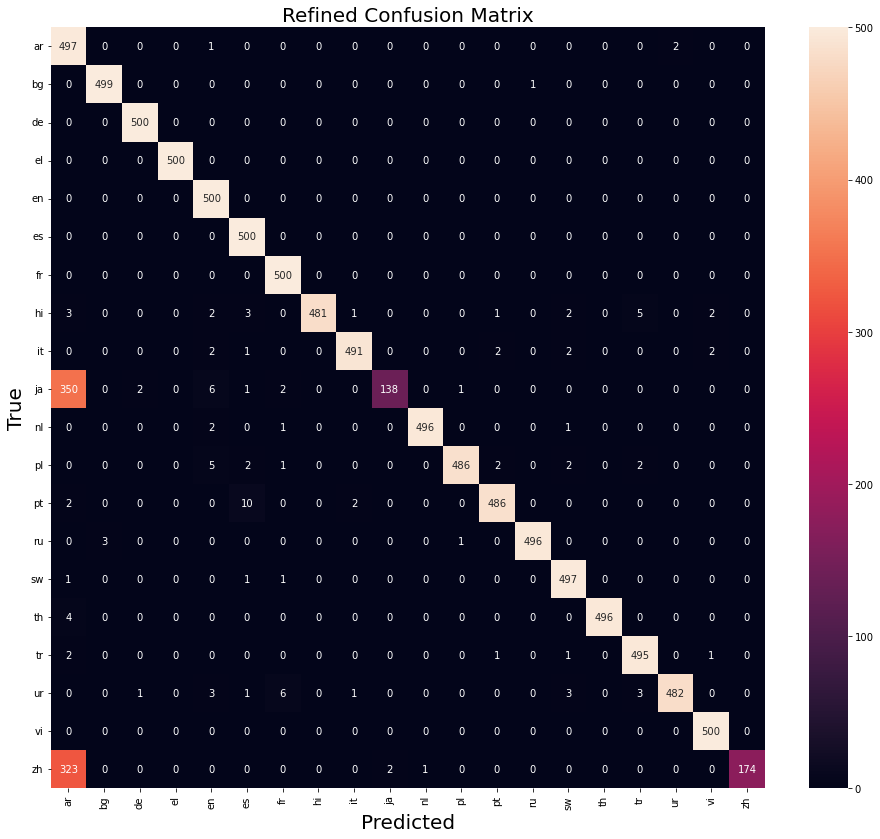

Classification Report:
              precision    recall  f1-score   support

           0       0.42      0.99      0.59       500
           1       0.99      1.00      1.00       500
           2       0.99      1.00      1.00       500
           3       1.00      1.00      1.00       500
           4       0.96      1.00      0.98       500
           5       0.96      1.00      0.98       500
           6       0.98      1.00      0.99       500
           7       1.00      0.96      0.98       500
           8       0.99      0.98      0.99       500
           9       0.99      0.28      0.43       500
          10       1.00      0.99      0.99       500
          11       1.00      0.97      0.98       500
          12       0.99      0.97      0.98       500
          13       1.00      0.99      0.99       500
          14       0.98      0.99      0.99       500
          15       1.00      0.99      1.00       500
          16       0.98      0.99      0.99       500
    

In [11]:
check_model_performance(mnb_model, x_test, y_test)

Confusion Matrix:


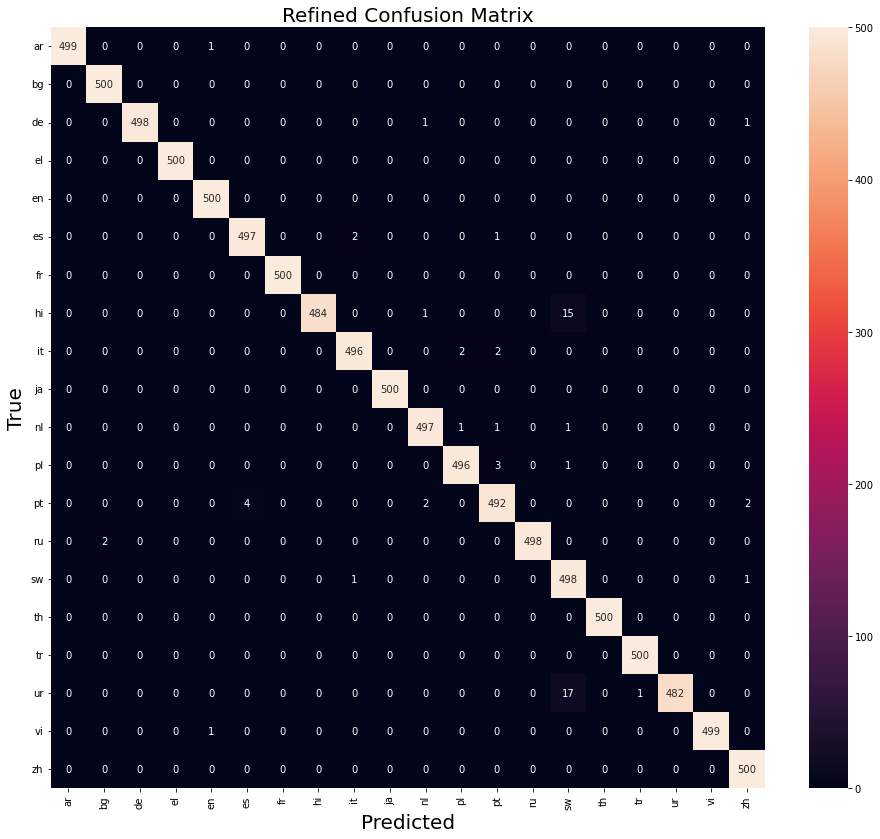

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       500
           1       1.00      1.00      1.00       500
           2       1.00      1.00      1.00       500
           3       1.00      1.00      1.00       500
           4       1.00      1.00      1.00       500
           5       0.99      0.99      0.99       500
           6       1.00      1.00      1.00       500
           7       1.00      0.97      0.98       500
           8       0.99      0.99      0.99       500
           9       1.00      1.00      1.00       500
          10       0.99      0.99      0.99       500
          11       0.99      0.99      0.99       500
          12       0.99      0.98      0.98       500
          13       1.00      1.00      1.00       500
          14       0.94      1.00      0.97       500
          15       1.00      1.00      1.00       500
          16       1.00      1.00      1.00       500
    

In [12]:
check_model_performance(lr_model, x_test, y_test)

Confusion Matrix:


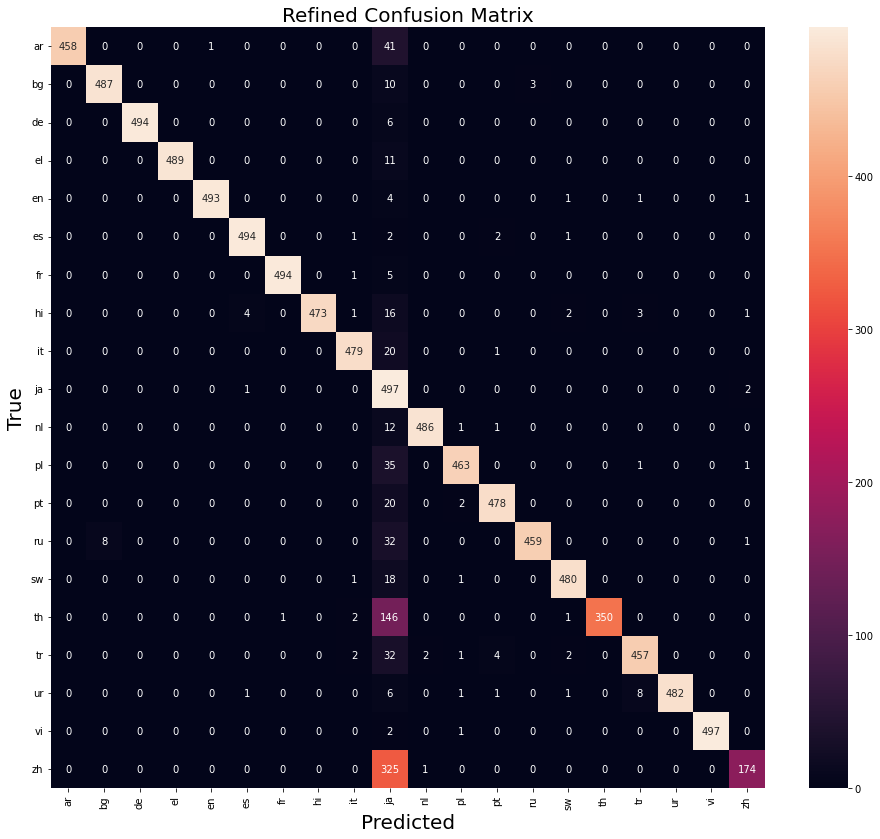

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96       500
           1       0.98      0.97      0.98       500
           2       1.00      0.99      0.99       500
           3       1.00      0.98      0.99       500
           4       1.00      0.99      0.99       500
           5       0.99      0.99      0.99       500
           6       1.00      0.99      0.99       500
           7       1.00      0.95      0.97       500
           8       0.98      0.96      0.97       500
           9       0.40      0.99      0.57       500
          10       0.99      0.97      0.98       500
          11       0.99      0.93      0.95       500
          12       0.98      0.96      0.97       500
          13       0.99      0.92      0.95       500
          14       0.98      0.96      0.97       500
          15       1.00      0.70      0.82       500
          16       0.97      0.91      0.94       500
    

In [13]:
check_model_performance(lr_model_count, x_test, y_test)

Confusion Matrix:


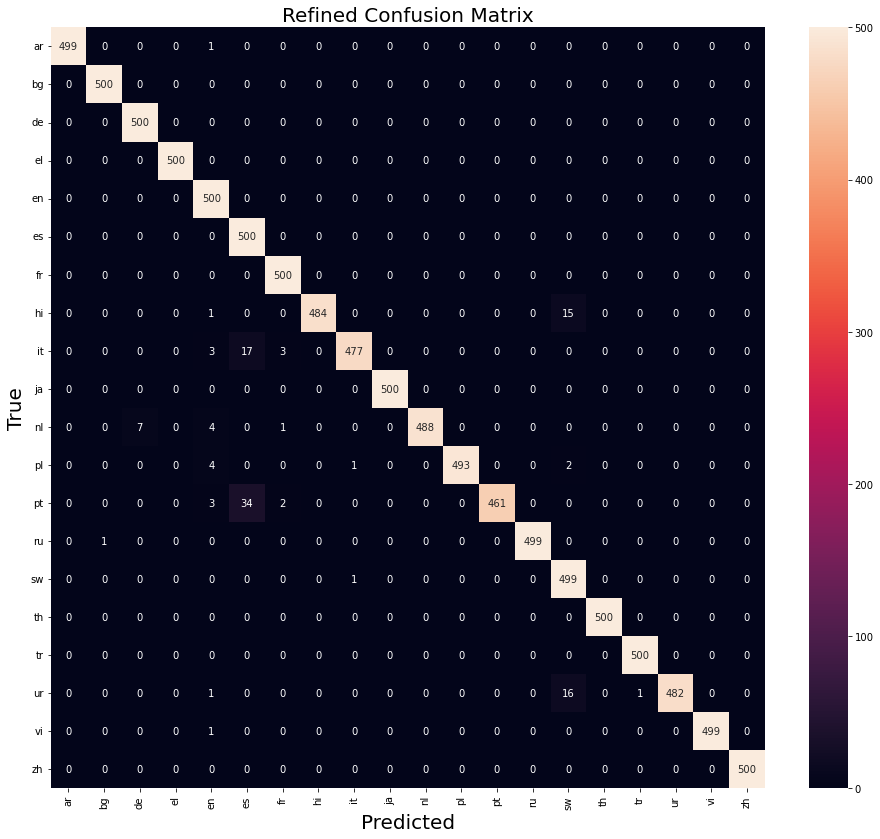

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       500
           1       1.00      1.00      1.00       500
           2       0.99      1.00      0.99       500
           3       1.00      1.00      1.00       500
           4       0.97      1.00      0.98       500
           5       0.91      1.00      0.95       500
           6       0.99      1.00      0.99       500
           7       1.00      0.97      0.98       500
           8       1.00      0.95      0.97       500
           9       1.00      1.00      1.00       500
          10       1.00      0.98      0.99       500
          11       1.00      0.99      0.99       500
          12       1.00      0.92      0.96       500
          13       1.00      1.00      1.00       500
          14       0.94      1.00      0.97       500
          15       1.00      1.00      1.00       500
          16       1.00      1.00      1.00       500
    

In [14]:
check_model_performance(mnb_model_param, x_test, y_test)

Confusion Matrix:


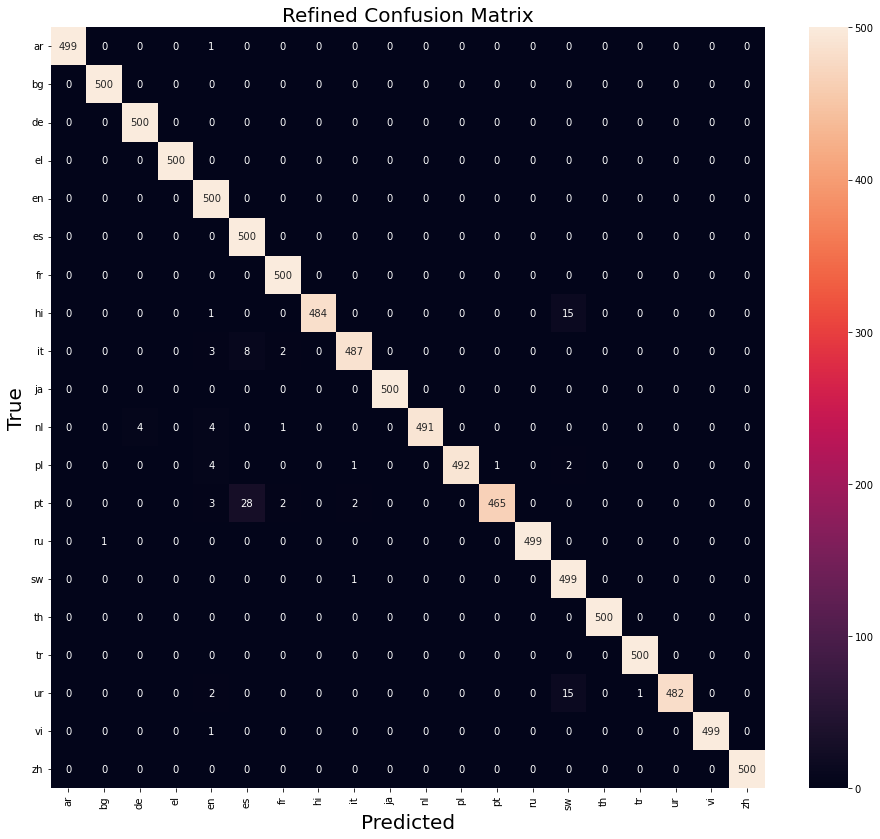

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       500
           1       1.00      1.00      1.00       500
           2       0.99      1.00      1.00       500
           3       1.00      1.00      1.00       500
           4       0.96      1.00      0.98       500
           5       0.93      1.00      0.97       500
           6       0.99      1.00      1.00       500
           7       1.00      0.97      0.98       500
           8       0.99      0.97      0.98       500
           9       1.00      1.00      1.00       500
          10       1.00      0.98      0.99       500
          11       1.00      0.98      0.99       500
          12       1.00      0.93      0.96       500
          13       1.00      1.00      1.00       500
          14       0.94      1.00      0.97       500
          15       1.00      1.00      1.00       500
          16       1.00      1.00      1.00       500
    

In [15]:
check_model_performance(mnb_model_tfidf, x_test, y_test)

Confusion Matrix:


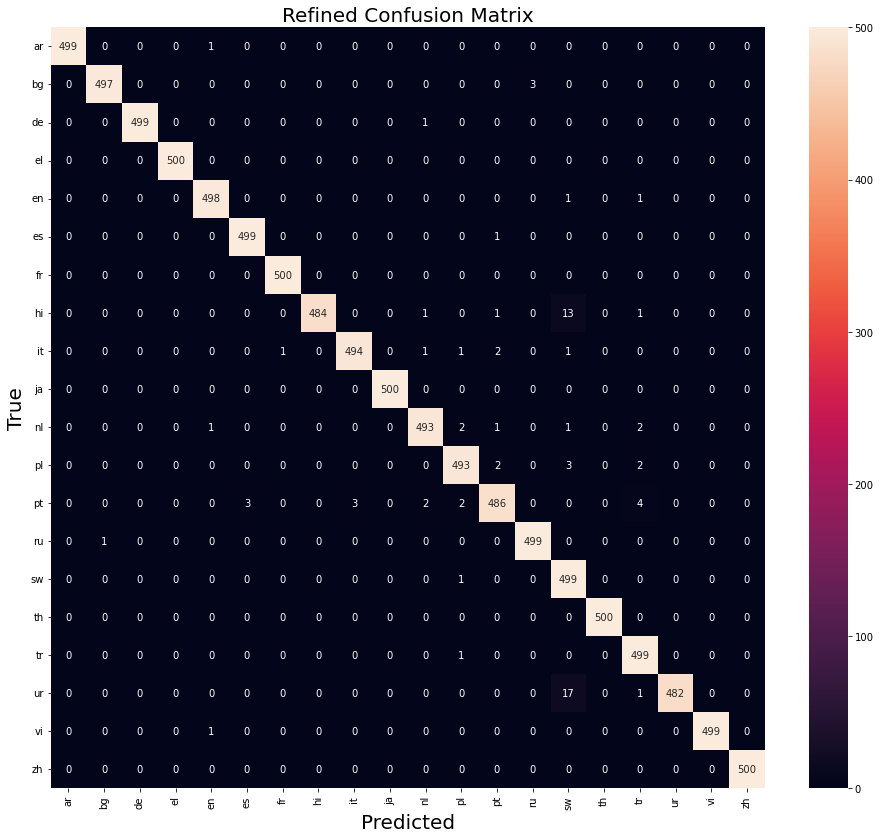

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       500
           1       1.00      0.99      1.00       500
           2       1.00      1.00      1.00       500
           3       1.00      1.00      1.00       500
           4       0.99      1.00      1.00       500
           5       0.99      1.00      1.00       500
           6       1.00      1.00      1.00       500
           7       1.00      0.97      0.98       500
           8       0.99      0.99      0.99       500
           9       1.00      1.00      1.00       500
          10       0.99      0.99      0.99       500
          11       0.99      0.99      0.99       500
          12       0.99      0.97      0.98       500
          13       0.99      1.00      1.00       500
          14       0.93      1.00      0.96       500
          15       1.00      1.00      1.00       500
          16       0.98      1.00      0.99       500
    

In [16]:
check_model_performance(lr_model_param, x_test, y_test)

In [17]:
list_model_names = ["lr_model", "mnb_model", "lr_model_count", "mnb_model_tfidf", "mnb_model_param", "lr_model_param"]
list_model = [lr_model, mnb_model, lr_model_count, mnb_model_tfidf, mnb_model_param, lr_model_param]
print_all_model_accuracy(list_model_names, list_model, x_test, y_test)

lr_model accuracy score: 0.9936
mnb_model accuracy score: 0.9214
lr_model_count accuracy score: 0.9184
mnb_model_tfidf accuracy score: 0.9897
mnb_model_param accuracy score: 0.9881
lr_model_param accuracy score: 0.9920
